# Fondamenti di Analisi Dati - a.a. 2020/2021

In questo laboratorio tratteremo la correlazioni tra variabili e la regressione lineare.

## 8 Correlazione tra Variabili

In statistica per correlazione tra due variabili si intende una relazione tale che ai valori assunti da una variabile corrispondono "con una certa regolarità" ai valori assunti da un'altra. Ad esempio, ci aspettiamo che l'altezza e il peso di una persona siano correlate, ovvero che ad un'altezza maggiore corrisponda un peso maggiore. Esistono diversi strumenti per misurare la correlazione tra due variabili.

### 8.1 Dataset
Come caso di studio considereremo un sottoinsieme di dati estratti dal National Health Interview Survey (http://www.cdc.gov/NCHS/NHIS.htm). Si tratta di 4231 record acquisiti da altrettanti soggetti. Ogni record riporta:
 * Il sesso del soggetto (**sex**);
 * L'indice di massa corporea del soggetto in $Kg/m^2$ (**BMI**);
 * L'altezza del soggetto in centimetri (**height**);
 * Il peso del soggetto in chilogrammi (**weight**).
 
Importiamo il dataset e visualizziamone le prime righe:

In [1]:
import pandas as pd
data = pd.read_csv('height_weight.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 4 columns):
sex       4231 non-null object
BMI       4231 non-null float64
height    4231 non-null float64
weight    4231 non-null float64
dtypes: float64(3), object(1)
memory usage: 132.3+ KB
None


,sex,BMI,height,weight
0,M,33.36,187.96,117.933920
1,M,26.54,177.80,83.914520
2,F,32.13,154.94,77.110640
3,M,26.62,172.72,79.378600
4,F,27.13,167.64,76.203456


### 8.2 Studiare le correlazioni mediante Scatterplot

Dato che il dataset è multivariato, visualizziamo una scatter matrix per iniziare a studiare le relazioni tra le diverse variabili:

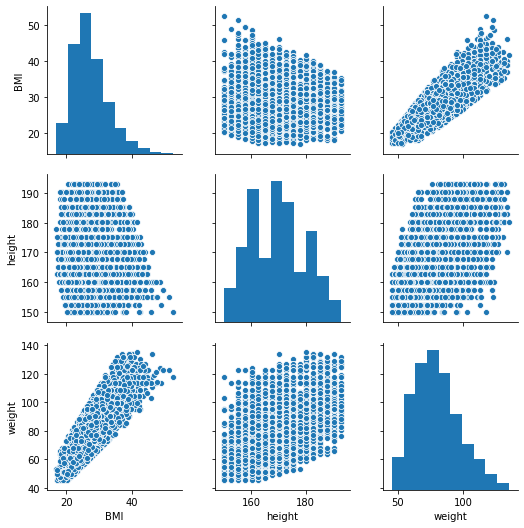

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.pairplot(data)
plt.show()

### 8.3 Indice di Correlazione di Pearson

L'analisi dello scatterplot ci permette di capire se ci sono coppie di variabili più o meno correlate. Tuttavia, è spesso utile avere un indicatore che possa "quantificare" la correlazione tra due variabili. Abbiamo visto che la covarianza ci permette di ottenere una stima di quanto "i valori di due variabili varino insieme". Calcoliamo le covarianze del dataset e vediamo se esiste una relazione tra i numeri ottenuti e lo scatterplot visto prima:



In [8]:
data.cov()

,BMI,height,weight
BMI,27.990461,-0.800246,78.186608
height,-0.800246,99.130776,91.534073
weight,78.186608,91.534073,310.229617


Benché esista una relazione tra i segni delle covarianze e le relazioni tra le variabili, i valori assoluti delle covarianze sono influenzati dai range delle variabili. Consideriamo ad esempio la coppia di variabili (weight,BMI) e visualizziamone scatterplot e covarianza:

Covarianza tra weight e BMI: 78.18660757544716


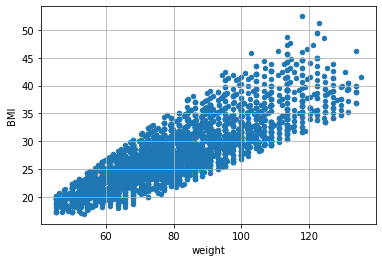

In [4]:
print("Covarianza tra weight e BMI:",data.cov()['weight']['BMI'])
data.plot.scatter('weight','BMI')
plt.grid()
plt.show()

Cambiamo adesso il range di BMI moltiplicandone i valori per 2:

Covarianza tra weight e BMI: 312.7464303017886


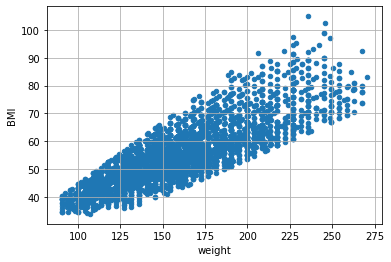

In [5]:
data_mod = data.copy()
data_mod['weight']*=2
data_mod['BMI']*=2
print("Covarianza tra weight e BMI:",data_mod.cov()['weight']['BMI'])
data_mod.plot.scatter('weight','BMI')
plt.grid()
plt.show()

Per ottenere un indice invariante rispetto a quanto i valori delle variabili siano dispersi possiamo applicare lo z-scoring alle due variabili, indipendentemente, prima di calcolare le covarianze. È come se "riscrivessimo" la definizione di covarianza sostituendo alle deviazioni dalla media gli z-scores, ottenendo così la definizione di **indice di correlazione di Pearson**:

\begin{equation}
\sigma_{XY} = \frac{1}{N}\sum_i^N (x_i - \overline x) (y_i - \overline y)
\end{equation}

\begin{equation}
z_i = \frac{x_i-\mu_X}{\sigma_X}
\end{equation}

\begin{equation}
\rho=\frac{1}{N}\sum_i^N \frac{(x_i - \mu_X)}{\sigma_X} \frac{(y_i - \mu_Y)}{\sigma_Y} = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}
\end{equation}

Possiamo calcolare l'indice di correlazione di Pearson tra due variabili utilizzando la funzione `pearsonr` di `scipy`. Calcoliamo l'indice di correlazione di Pearson delle due coppie di variabili (weight, BMI) originale e modificata.

In [8]:
from scipy.stats import pearsonr
print(pearsonr(data['weight'],data['BMI']))
print(pearsonr(data_mod['weight'],data_mod['BMI']))

(0.8390458923855599, 0.0)
(0.8390458923855599, 0.0)


La funzione `personr` restituisce due valori: un indice di correlazione e un p-value. Il p-value è ottenuto mediante un opportuno test statistico e indica la probabilità di osservare l'indice di Pearson trovato se in realtà non sussiste alcuna correlazione tra le variabili (ovvero, la probabilità che l'indice osservato sia dovuto al caso). La correlazione si dice **statisticamente rilevante** se il p-value è al di sotto di un valore soglia (livello di significatività) scelto in precedenza, e generalmente fissato a $0.05$. Nel caso visto sopra, gli indici trovati mostrano una correlazione statisticamente rilevante.

Come si può notare i valori ottenuti per le due coppie di variabili sono identici, il che indica che l'indice di correlazione di Pearson, per via della normalizzazione z-scoring, è insensibile alla dispersione delle variabili.

#### 8.3.1 Interpretazione dei valori dell'indice di correlazione di Pearson
L'indice di correlazione di Pearson è un numero compreso tra $-1$ e $1$ che indica se sussiste una correlazione (ovvero, quando i valori della prima variabile crescono, anche i valori della seconda variabile crescono) o un'anticorrelazione (ovvero, quando i valori della prima variabile crescono, i valori della seconda variabile decrescono e viceversa). Valori prossimi a $-1$ indicano che le variabili sono anticorrelate; valori prossimi a $1$ indicano che le variabili sono correlate; valori prossimi a $0$ indicano che le variabili sono decorrelate. In pratica:<br><br>
<u>Il segno dell'indice indica il "verso" della correlazione:</u>
 <ul>
   <li>Positivo: le variabili sono correlate;
   <li>Negativo: le variabili sono anticorrelate;
 </ul>
<u>Il valore assoluto dell'indice indica quanto la correlazione (o anticorrelazione) sia forte:</u>
 <ul>
   <li>per valori compresi tra $0$ e $0.3$ si parla di correlazione (o anticorrelazione) debole;
   <li>per valori compresi tra $0.3$ e $0.7$ si parla di correlazione (o anticorrelazione) moderata;
   <li>per valori compresi tra $0.7$ e $1$ si parla di correlazione (o anticorrelazione) forte.
 </ul>
Si noti che l'indice di correlazione di Pearson misura solo le **correlazioni lineari**. Pertanto, tra due variabili potrebbe sussistere una correlazione non lineare anche se l'indice di correlazione ottenuto è basso. 

Ricalcoliamo l'indice di correlazione di Pearson tra le due variabili considerate e analizziamo i risultati:

In [9]:
print(pearsonr(data['weight'],data['BMI']))

(0.8390458923855599, 0.0)


L'indice suggerisce una forte correlazione lineare positiva. Il p-value nullo indica che tale correlazione è statisticamente rilevante.

#### 8.3.2 Esempi di campioni più o meno correlati e indici di correlazione di Pearson che si ottengono da essi
Costruiamo qualche campione bivariato di esempio che contenga diversi gradi di correlazione e osserviamo come variano gli indici di Pearson ottenuti e i relativi scatterplot.

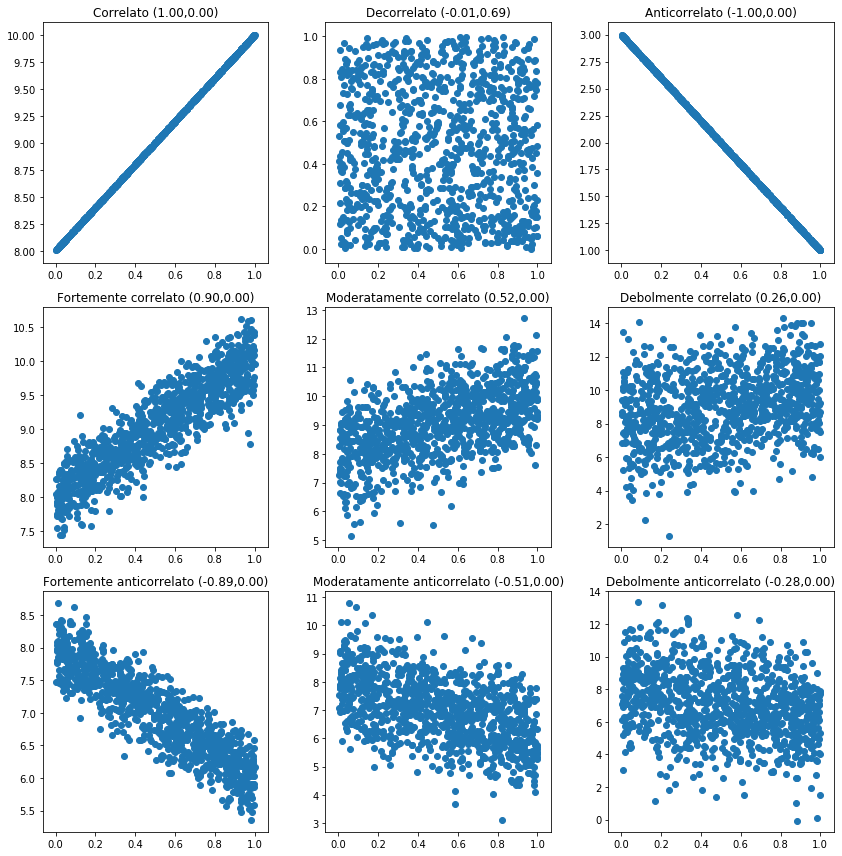

In [10]:
import numpy as np
import pandas as pd
np.random.seed(1234)

x = np.random.rand(1000)
y = np.random.rand(1000)

campione_decorrelato = pd.DataFrame({'x':x,'y':y})

campione_correlato = pd.DataFrame({'x':x,'y':2*x+8})
campione_anticorrelato = pd.DataFrame({'x':x,'y':-2*x+3})

campione_fortemente_correlato =  pd.DataFrame({'x':x,'y':2*x+8+np.random.normal(0,0.3,1000)})
campione_fortemente_anticorrelato =  pd.DataFrame({'x':x,'y':-2*x+8+np.random.normal(0,0.3,1000)})

campione_moderatamente_correlato =  pd.DataFrame({'x':x,'y':2*x+8+np.random.normal(0,1,1000)})
campione_moderatamente_anticorrelato =  pd.DataFrame({'x':x,'y':-2*x+8+np.random.normal(0,1,1000)})

campione_debolmente_correlato =  pd.DataFrame({'x':x,'y':2*x+8+np.random.normal(0,2,1000)})
campione_debolmente_anticorrelato =  pd.DataFrame({'x':x,'y':-2*x+8+np.random.normal(0,2,1000)})

plt.figure(figsize=(12,12))
plt.subplot(331)
s=campione_correlato
plt.scatter(s['x'],s['y'])
plt.title("Correlato (%0.2f,%0.2f)"%pearsonr(s['x'],s['y']))

plt.subplot(332)
s=campione_decorrelato
plt.scatter(s['x'],s['y'])
plt.title("Decorrelato (%0.2f,%0.2f)"%pearsonr(s['x'],s['y']))

plt.subplot(333)
s=campione_anticorrelato
plt.scatter(s['x'],s['y'])
plt.title("Anticorrelato (%0.2f,%0.2f)"%pearsonr(s['x'],s['y']))

plt.subplot(334)
s=campione_fortemente_correlato
plt.scatter(s['x'],s['y'])
plt.title("Fortemente correlato (%0.2f,%0.2f)"%pearsonr(s['x'],s['y']))

plt.subplot(335)
s=campione_moderatamente_correlato
plt.scatter(s['x'],s['y'])
plt.title("Moderatamente correlato (%0.2f,%0.2f)"%pearsonr(s['x'],s['y']))

plt.subplot(336)
s=campione_debolmente_correlato
plt.scatter(s['x'],s['y'])
plt.title("Debolmente correlato (%0.2f,%0.2f)"%pearsonr(s['x'],s['y']))

plt.subplot(337)
s=campione_fortemente_anticorrelato
plt.scatter(s['x'],s['y'])
plt.title("Fortemente anticorrelato (%0.2f,%0.2f)"%pearsonr(s['x'],s['y']))

plt.subplot(338)
s=campione_moderatamente_anticorrelato
plt.scatter(s['x'],s['y'])
plt.title("Moderatamente anticorrelato (%0.2f,%0.2f)"%pearsonr(s['x'],s['y']))

plt.subplot(339)
s=campione_debolmente_anticorrelato
plt.scatter(s['x'],s['y'])
plt.title("Debolmente anticorrelato (%0.2f,%0.2f)"%pearsonr(s['x'],s['y']))

plt.tight_layout()

plt.show()

Osservando i grafici mostrati sopra, possiamo notare che sussistono le seguenti relazioni tra indice e scatterplot:
 * Un indice positivo individua un andamento ascendente (una retta con coefficiente angolare positivo);
 * Un indice negativo individua un andamento discendente (una retta con coefficiente angolare negativo);
 * Il valore assoluto dell'indice è correlato alla "larghezza" del "corridoio" formato dai dati.
 
Si noti che non esiste alcuna relazione tra indice di correlazione di Pearson e pendenza della retta. Possiamo verificarlo con un semplice esperimento:

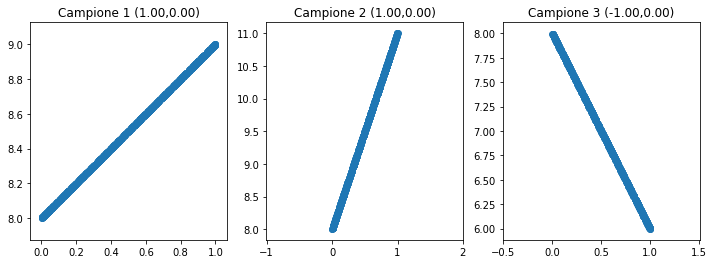

In [17]:
campione1 =  pd.DataFrame({'x':x,'y':x+8})
campione2 =  pd.DataFrame({'x':x,'y':3*x+8})
campione3 =  pd.DataFrame({'x':x,'y':-2*x+8})

plt.figure(figsize=(12,4))
plt.subplot(131)
s=campione1
plt.scatter(s['x'],s['y'])
plt.axis('equal')
plt.title("Campione 1 (%0.2f,%0.2f)"%pearsonr(s['x'],s['y']))

plt.subplot(132)
s=campione2
plt.scatter(s['x'],s['y'])
plt.axis('equal')
plt.title("Campione 2 (%0.2f,%0.2f)"%pearsonr(s['x'],s['y']))

plt.subplot(133)
s=campione3
plt.scatter(s['x'],s['y'])
plt.axis('equal')
plt.title("Campione 3 (%0.2f,%0.2f)"%pearsonr(s['x'],s['y']))
plt.show()

Rette di inclinazione diversa possono avere lo stesso indice di Pearson.

### 8.4 Indice di Correlazione di Spearman

L'indice di Pearson funziona se la relazione tra le variabili è **lineare** e se le variabili sono distribuite in maniera approssimativamente **normale**. Inoltre l'indice di Pearson non è buono nei casi in cui siano presenti molti outliers. L'indice di correlazione per ranghi di Spearman cerca di ovviare a questo problema ordinando tutti i valori e sostituendo ad essi il loro rango, ovvero la posizione che essi occupano nella lista ordinata. A questo punto, l'indice di Pearson viene calcolato sui ranghi. L'indice di Spearman si calcola come segue:

In [11]:
from scipy.stats import spearmanr
print(spearmanr(data['weight'],data['BMI']))

SpearmanrResult(correlation=0.8426515216724353, pvalue=0.0)


In questo caso, abbiamo ottenuto un valore di correlazione molto simile a quello di Pearson. Vediamo un esempio in cui ciò non accade.

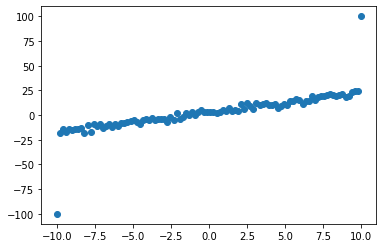

Indice di correlazione di Pearson: 0.7929596906315146
Indice di correlazione di Spearman: 0.9864746474647464


In [13]:
x=np.linspace(-10,10,100) 
y=x*2+3+np.random.normal(0,2,100) #modello lineare + rumore Gaussiano

y[0]=-100 #aggiungo degli outliers
y[-1]=100

plt.scatter(x,y)
plt.show()

print("Indice di correlazione di Pearson:",pearsonr(x,y)[0])
print("Indice di correlazione di Spearman:",spearmanr(x,y)[0])

### 8.5 Indice di Correlazione di Kendall

Analogamente, l'indice di correlazione di Kendall può essere calcolato come segue:

In [14]:
from scipy.stats import kendalltau
print(kendalltau(data['weight'],data['BMI']))

KendalltauResult(correlation=0.6564411007431801, pvalue=0.0)


### 8.6 Matrice di Correlazione

Analogamente a quanto visto nel caso degli scatterplot, quando abbiamo più variabili, possiamo calcolare gli indici di correlazione tra tutte le variabili del dataset. Otteniamo in questo modo una "matrice di correlazione", simile alla matrice delle covarianze vista in precedenza. Possiamo calcolare la matrice di correlazione mediante il metodo `corr` di Pandas:

In [15]:
data.corr() # attraverso il parametro method è possibile scegliere l'indice di correlazione (default: method='pearson')

,BMI,height,weight
BMI,1.000000,-0.015192,0.839046
height,-0.015192,1.000000,0.521960
weight,0.839046,0.521960,1.000000


Possiamo ottenere una rappresentazione grafica della matrice di correlazione mediante la funzione `heatmap` di `seaborn`:

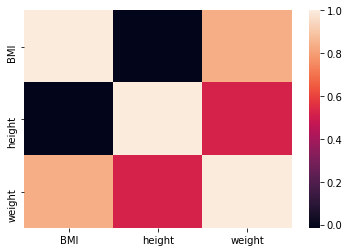

In [16]:
sns.heatmap(data.corr())
plt.show()

## 8.7 Regressione Lineare

L'indice di correlazione di Pearson ci permette di capire se esiste una correlazione tra due variabili e di misurarne l'intensità. Tuttavia, tale indice non ci dice nulla sulla "qualità" della correlazione. Abbiamo ad esempio visto che coppie di variabili correlate in maniera diversa (es, variabili che individuavano rette di pendenza diversa) possono essere caratterizzati dallo stesso indice di correlazione di Pearson. 

La regressione lineare ci permette di modellare la relazione tra una **variabile dipendente** $y$ e una o più **variabili indipendenti** (o regressori) $x_i$. Ciò avviene definendo il seguente modello parametrico:

\begin{equation}
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \epsilon
\end{equation}

dove:
 * $\beta_0, \ldots, \beta_n$ sono i parametri del modello;
 * $\beta_0$ è l'intercetta;
 * $\beta_1, \ldots, \beta_n$ sono detti _coefficienti di regressione_;
 * $n$ è il numero di variabili indipendenti $x_i$;
 * $\epsilon$ è il termine di errore (o rumore), ovvero la parte di $y$ che la regressione "non riesce a spiegare".

La notazione sopra può essere anche scritta nella forma:

\begin{equation}
y = \beta_0 + \mathbf{\beta} \mathbf{X} + \epsilon
\end{equation}

dove $\mathbf{\beta} = [\beta_1, \ldots, \beta_n]$ e $\mathbf{X}=[x_1,\ldots,x_n]^T$.

Dato un insieme di dati, è possibile stimare i parametri ottimali $\beta_0$ e $\mathbf{\beta}$ del regressore lineare mediante una procedura di ottimizzazione. Il regressore calcolato fornisce un modello in grado di spiegare le relazioni (lineari) tra le variabili indipendenti e la variabile dipendente.

### 8.7.1 Regressione Lineare Semplice

Vediamo un esempio di regressione semplice (ovvero rispetto a una sola variabile indipendente $x_1$). Consideriamo le variabili `weight` e `BMI`, cercando di prevedere i valori di `BMI` da `weight`. Costruiremo dunque un modello lineare di questo tipo:

\begin{equation}
BMI = \beta_0 + \beta_1 \cdot weight
\end{equation}

dove:
 * **weight** è la variabile indipendente;
 * **BMI** è la variabile dipendente;
 * $\beta_1$ è il coefficiente di `weight`;
 * $\beta_0$ è l'intercetta.

Per definire e calcolare il modello di regressione lineare, utilizzeremo il metodo dei minimi quadrati (Ordinary Least Squares - OLS), implementato dalla libreria **statsmodels**:

In [18]:
from statsmodels.formula.api import ols
#la notazione y ~ x indica che y è la variabile
#dipendente e x è la variabile indipendente
#le altre variabili del dataframe saranno scartate
model = ols("BMI ~ weight",data).fit()

#visualizziamo i parametri del modello
model.params

Intercept    7.371959
weight       0.252028
dtype: float64

Abbiamo calcolato il modello lineare:

\begin{equation}
BMI = 0.25 \cdot weight + 7.37
\end{equation}

che ci permette di calcolare il valore di `BMI` dai valori di `weight`. 

Il modello mette a disposizione il metodo **predict** per effettuare questo tipo di calcoli. Il metodo però vuole che specifichiamo il nome delle variabili indipendenti per le quali stiamo fornendo i valori. Ciò si può fare definendo al volo un dizionario:

In [19]:
model.predict({'weight':[59, 61, 73, 80]})

0    22.241622
1    22.745679
2    25.770017
3    27.534214
dtype: float64

Il modello calcolato non è altro che una retta che fa corrispondere valori di `weight` a valori di `BMI`. Possiamo facilmente visualizzare la retta utilizzando la libreria `seaborn`:

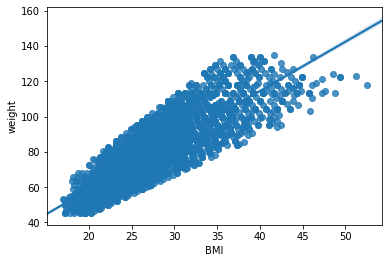

In [23]:
sns.regplot('BMI','weight',data)
plt.show()

#### 8.7.1.1 Analisi di un regressore lineare

Analizziamo adesso il regrssore ottenuto e vediamo che interpretazione hanno i parametri individuati. Possiamo visualizzare un sommario sul regressore mediante il metodo `summary` dell'oggetto `ols`:

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BMI   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                 1.006e+04
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        18:46:40   Log-Likelihood:                -10476.
No. Observations:                4231   AIC:                         2.096e+04
Df Residuals:                    4229   BIC:                         2.097e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3720      0.203     36.253      0.000       6.973       7.771
weight         0.2520      0.003    100.290      0.000       0.247       0.257
==============================================================================
Omnibus:                      342.463   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              467.107
Skew:                           0.679   Prob(JB):                    3.71e-102
Kurtosis:                       3.896   Cond. No.                         372.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Il sommario presenta molte informazioni. Alcune di esse sono autoesplicative, come ad esempio "Dep. Variable", "Model", "Method", "Date", "Time", "No. Observations", "coef". Altre sono invece molto specifiche. Tra tutti i valori mostrati, alcuni importanti sono:
 * R-squared e Adjusted R-squared;
 * F-statistic e prob(F-statistic);
 * Valori $t$ dei singoli parametri e relativi valori di $P>|t|$;
 * I valori trovati per i singoli parametri.
Analizziamo il significato di ciascuno di questi valori:

### R-squared
Il valore R-squared di un regressore lineare si definisce come segue:

\begin{equation}
R^2 = 1- \frac{Var(\varepsilon)}{Var(Y)}
\end{equation}

Dove:
 * $Y=\{y_i\}$ è l'insieme dei valori assunti dalla variabile dipendente;
 * $\varepsilon=\{\varepsilon_i=\beta_0 + \beta_1 x_i-y_i\}$ sono i residuali (le differenze tra valori predetti mediante il modello e valori corretti);
 * $Var(Y)$ indica la varianza di $Y$.

Un valore basso di $R^2$ indica un modello lineare poco informativo in quanto, usare il modello lineare, non è tanto meglio di cercare di prevedere $Y$ usando il valore medio $\mu_Y$ . Un valore alto di $R^2$ indica che il modello lineare permette di predire i valori di $Y$ in maniera significativamente migliore rispetto a utilizzare il valore medio $\mu_Y$. Un valore di $R^2$ intermedio (es. $0.5$) ci dice che il modello lineare riesce comunque a fornire un valore aggiunto rispetto a utilizzare il valore medio $\mu_Y$, anche se il modello può non essere perfetto.

Inoltre, il valore di $R^2$ è uguale al quadrato dell'indice di correlzione di Pearson nel caso della regressione semplice. Il valore Adjusted $R^2$ è una versione di $R^2$ normalizzato. In pratica, quando si effettua la regressione con più variabili, l'Adjusted $R^2$ è un indicatore più robusto della bontà del regressore.

**In sintesi**: il valore di $R^2$ ci dice quanto il modello lineare "spieghi" i valori della variabila dipendente, dati i valori delle variabili indipendenti. Anche valori bassi di $R^2$ indicano che il regressore ha un qualche valore, benché i valori della variabile dipendente non possano essere spiegati (in maniera lineare) esclusivamente usando le variabili indipendenti.

### F-statistic e prob(F-statistic)

Il valore di F-statistic indica la statistica di un test statistico "F" che mira a di rigettare l'ipotesi nulla che tutti i parametri trovati appartengono a una distribuzione di media nulla. Se tale ipotesi fosse verificata, il regressore non sarebbe significativo e i valori non nulli dei parametri sarebbero frutto del caso (o del rumore nelle osservazioni). Più è alto questo numero, più è "prudente" rigettare l'ipotesi nulla e dunque il regressore è significativo.

Il valore prob(F-statistic) indica la probabilità di ottenere una F-statistic uguale o superiore a quella mostrata se l'ipotesi nulla è in realtà vera. Analogamente a quanto visto nel caso del p-value per l'indice di correlazione di Pearson, il regressore sarà statisticamente rilevante se presenta un p-value basso.

### Valori $t$ dei singoli parametri e relativi valori di $P>|t|$

I valori t riportati per i singoli parametri indicano le statistiche di un test t-student che mira a rigettare l'ipotesi nulla che il parametro in oggetto appartiene a una distribuzione di media nulla. Se tale ipotesi fosse verificata, il valore non nullo osservato per il parametro sarebbe frutto del caso. Più il valore assoluto del t-value è grande, più il parametro è significativo. 

Anche in questo caso, il valore va letto insieme al relativo p-value, indicato come P>|t| nella tabella. Un p-value al di sotto del livello di significatività scelto (es. $0.05$) indica che la variabile in considerazione contribuisce significativamente alla regressione.

### Valori dei parametri

I valori dei singoli parametri vanno interpretati come segue:
 * Valore dell'**intercetta**: indica il valore assunto dalla variabile dipendente, quando la variabile indipendente è nulla. Ad esempio, dato il modello $y=3x+8$, il valore dell'intercetta $8$ indica che se $x=0$, allora $y=8$;
 * Valore del **coefficiente** relativo ad una data variabile: indica di quanto varia il valore della variabile dipendente, quando il valore delle variabile indipendente varia di una unità. Ad esempio, dato il modello $y=3x+8$, possiamo dire che aumentando il valore di $x$ di una unità, il valore di $y$ aumenta di $3$ unità (il valore del coefficiente relativo a $x$).

### Analisi di un regressore lineare

Utilizziamo quanto discusso sopra per analizzare il regressore lineare costruito in precedenza per predire i valori di `BMI` da `weight`. Mostriamo il summary del modello:

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BMI   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                 1.006e+04
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:17:19   Log-Likelihood:                -10476.
No. Observations:                4231   AIC:                         2.096e+04
Df Residuals:                    4229   BIC:                         2.097e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3720      0.203     36.253      0.000       6.973       7.771
weight         0.2520      0.003    100.290      0.000       0.247       0.257
==============================================================================
Omnibus:                      342.463   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              467.107
Skew:                           0.679   Prob(JB):                    3.71e-102
Kurtosis:                       3.896   Cond. No.                         372.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Il valore di $R^2$ indica che la conoscenza di `weight` permette di ridurre l'errore sulle predizioni di `BMI` del $70\%$. Ciò vuol dire che, benché `weight` da sola non riesca a spiegare (linearmente) `BMI`, le due variabili sono piuttosto correlate. (Si noti che in realtà sappiamo che `BMI` si calcola a partire da `height` e `weight`, quindi questa non dovrebbe essere una scoperta sorprendente). Il valore della F-statistic è alto, mentre quello di Prob(F-statistic) è nullo. Possiamo concludere che il regressore è statisticamente significativo.

I p-value relativi a entrambi i parametri sono nulli, pertanto entrambi i parametri sono statisticamente rilevanti. Il valore dell'intercetta è pari a $7.37$. Ciò indica che a un peso di $0\ Kg$ corrisponde un BMI pari a $7.37$ secondo il modello trovato. Il valore del coefficiente di `weight` è pari a $0.25$. Ciò significa che incrementando il peso di un kilogrammo, il BMI aumenta di $0.25\ Kg/m^2$.

### Mean Squared Error (MSE)
Il valore di $R^2$ ci permette di valutare quanto le variabili indipendenti "mi dicono" della variabile dipendente. Tuttavia, esso non misura direttamente l'errore commesso dal regressore quando predice nuovi valori. Tale misura si può ottenere calcolando l'errore standard (o Mean Squared Error - MSE) definito come segue:

\begin{equation}
Std.Error = \sqrt{MSE} = \sqrt{\frac{1}{N}\sum_{i=1}^{N}{(y_i-\hat y_i)^2}}
\end{equation}

Dove $N$ è il numero di campioni sul quale misuriamo l'errore, $y_i$ sono i valori reali della variabile dipendente e $\hat y_i$ sono i valori predetti dal modello.

L'errore standard misura quanto il modello "sbaglia" a predire i valori di $y$ e si esprime nella stessa unità di misura di $y$. Dunque un valore basso (idealmente $0$) indica un ottimo modello. Possiamo calcolare l'errore standard come segue:

In [32]:
np.sqrt(((data['BMI']-model.predict(data))**2).mean())

2.8780677466871194

In [36]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(data['BMI'], model.predict(data)))

2.8780677466871167

In questo caso possiamo concludere che il modello commette un errore medio di $2.88\ Kg/m^2$ (per eccesso o per difetto) nel predire i valori di `BMI` a partire dai valori di `weight`.

### 8.8 Regressione Lineare Multipla

Vediamo adesso un esempio di regressione multipla. La regressione lineare multipla permette di studiare le relazioni tra una variabile dipendente e un insieme di variabili indipendenti. Calcoliamo un regressore lineare per predire i valori di `BMI` da quelli di `height` e `weight`:

In [39]:
model = ols('BMI ~ height + weight',data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BMI   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 1.513e+05
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:16:22   Log-Likelihood:                -3987.0
No. Observations:                4231   AIC:                             7980.
Df Residuals:                    4228   BIC:                             7999.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.8865      0.171    327.627      0.000      55.552      56.221
height        -0.3310      0.001   -294.311      0.000      -0.333      -0.329
weight         0.3497      0.001    550.104      0.000       0.348       0.351
==============================================================================
Omnibus:                      441.026   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3489.395
Skew:                           0.132   Prob(JB):                         0.00
Kurtosis:                       7.441   Cond. No.                     3.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Il regressore lineare trovato ha un valore di $R^2$ molto alto ($0.986$), una F-statistic alta e un valore di Prob(F-statistic) nullo. Possiamo concludere che il regressore è significativo. I p-value dei parametri sono tutti nulli, il che significa che le variabili contribuiscono tutte significativamente alla regressione. 

L'intercetta ha un valore pari a $55.89$, il che indica che, idealmente, un soggetto di peso e altezza nulla avrebbe un `BMI` pari a $55.89\ Kg/m^2$. Il coefficiente di `height` indica che quando l'altezza viene incrementata di un metro, il BMI viene decrementato di $0.33\ Kg/m^2$. Analogamente, quando il peso viene incrementato di un kilogrammo, il BMI viene incrementato di $0.35\ Kg/m^2$.

### Boston House Pricing Dataset

Vediamo adesso un esempio con un dataset più complesso. Utilizzeremo il dataset "Boston" che contiene osservazioni relativi ai prezzi di diverse case nei sobborghi di Boston. Carichiamo il dataset mediante la funzione `get_rdataset` di `statsmodels`, che permette di caricare dataset contenuti nelle librerie del linguaggio R:

In [40]:
from statsmodels.datasets import get_rdataset
boston = get_rdataset('Boston', package='MASS')

I dataset caricati mediante `get_rdataset` presentano la medesima struttura. Esiste una documentazione nella proprietà `__doc__`. Stampiamola per farci un'idea più precisa sul dataset:

In [41]:
print(boston.__doc__)

+--------+-----------------+
| Boston | R Documentation |
+--------+-----------------+

Housing Values in Suburbs of Boston
-----------------------------------

Description
~~~~~~~~~~~

The ``Boston`` data frame has 506 rows and 14 columns.

Usage
~~~~~

::

   Boston

Format
~~~~~~

This data frame contains the following columns:

``crim``
   per capita crime rate by town.

``zn``
   proportion of residential land zoned for lots over 25,000 sq.ft.

``indus``
   proportion of non-retail business acres per town.

``chas``
   Charles River dummy variable (= 1 if tract bounds river; 0
   otherwise).

``nox``
   nitrogen oxides concentration (parts per 10 million).

``rm``
   average number of rooms per dwelling.

``age``
   proportion of owner-occupied units built prior to 1940.

``dis``
   weighted mean of distances to five Boston employment centres.

``rad``
   index of accessibility to radial highways.

``tax``
   full-value property-tax rate per \\$10,000.

``ptratio``
   pupil-teache

Il dataframe contenente le osservazioni si trova all'interno della proprietà `data`:

In [42]:
boston.data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Questo dataset è generalmente utilizzato come un dataset di regressione, nel quale l'obiettivo è quello di predire il valore di `medv` (prezzo medio delle case in migliaia di dollari) a partire dai valori delle altre variabili.

### Regressori lineari, variabili categoriche e variabili dummy
Notiamo che le variabili `rad` e `chas` sono categoriche. Quando si lavora con regressori lineari e variabili categoriche bisogna fare attenzione: 
 * Le variabili categoriche non vanno utilizzate come variabili dipendenti di un regressore lineare; 
 * Le variabili categoriche possono essere utilizzate invece come variabili indipendenti solo se binarie. 
`chas` è binaria, quindi possiamo includerla tra le variabili indipendenti. `rad` invece non è binaria, pertanto non può essere inclusa tra le variabili per la regressione. 

Se vogliamo includere `rad` tra le variabili per la regressione lineare, dobbiamo trasformarla in un insieme di variabili binarie "dummy". Ogni variabile "dummy" indicherà per ogni osservazione, se essa appartiene a una specifica classe tra quelle della variabile categorica considerata.

Vediamo un esempio:

In [43]:
var = pd.Series(['A','A','B','A','C','C','B','A','C','B'])
var

0    A
1    A
2    B
3    A
4    C
5    C
6    B
7    A
8    C
9    B
dtype: object

Si consideri `var` come una variabile categorica che consta di $10$ osservazioni e $3$ classi. Possiamo sostituire la variabile `var` con tre variabili `A`,`B`,`C` tali che `A` sarà pari a $1$ solo quando `var` è uguale ad `A`, `C` sarà pari a $1$ solo quando `var` è uguale ad `C`. Possiamo ottenere queste tre variabili dummy mediante la funzione `get_dummies` di Pandas:

In [44]:
pd.get_dummies(var)

,A,B,C
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,0,1
5,0,0,1
6,0,1,0
7,1,0,0
8,0,0,1
9,0,1,0


Confrontiamo ad esempio l'osservazione di indice $5$ della serie e del DataFrame di variabili dummy:

In [45]:
print(var[5],'\n')
print(pd.get_dummies(var).loc[5])

C 

A    0
B    0
C    1
Name: 5, dtype: uint8


Il valore di `var` è $C$. In maniera corrispondente, la variabile dummy `C` è pari a $1$, mentre le altre sono pari a zero. Questo tipo di rappresentazione di `var` è tuttavia ridondante. Infatti, se sappiamo che $B=0$ e $C=0$, possiamo facilmente dedurre che $A=1$. Questa semplice ridondanza può creare problemi di clacolo numerico nell'ottimizzazione del regressore lineare. Per evitarla, generalmente si esclude una delle variabili dummy. Possiamo ottenere questo risultato come segue:

In [47]:
pd.get_dummies(var,drop_first=True)

,B,C
0,0,0
1,0,0
2,1,0
3,0,0
4,0,1
5,0,1
6,1,0
7,0,0
8,0,1
9,1,0


Possiamo convertire la variabile categorica `rad` in un insieme di variabili dummy come segue:

In [48]:
boston_mod=pd.get_dummies(boston.data, columns=['rad'],drop_first=True)
boston_mod.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,...,lstat,medv,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,...,4.98,24.0,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,...,9.14,21.6,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,...,4.03,34.7,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,...,2.94,33.4,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,...,5.33,36.2,0,1,0,0,0,0,0,0


Ispezioniamo i nomi delle colonne:

In [49]:
boston_mod.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'tax',
       'ptratio', 'black', 'lstat', 'medv', 'rad_2', 'rad_3', 'rad_4', 'rad_5',
       'rad_6', 'rad_7', 'rad_8', 'rad_24'],
      dtype='object')

Notiamo che `rad` è stata rimossa e sostituita da diverse variabili dummy, rappresentanti i vari valori assunti da `rad`. Possiamo adesso procedere al calcolo del regressore lineare multiplo:

In [51]:
model=ols("""medv ~ crim + zn + indus + chas + nox + rm +age + dis + tax + 
          ptratio + black + lstat + rad_2 + rad_3 + rad_4 + rad_5 + rad_6 + 
          rad_7 + rad_8 + rad_24""", boston_mod).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     72.70
Date:                Wed, 04 Dec 2019   Prob (F-statistic):          8.29e-132
Time:                        11:20:39   Log-Likelihood:                -1489.6
No. Observations:                 506   AIC:                             3021.
Df Residuals:                     485   BIC:                             3110.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.2596      5.434      6.489      0.000      24.583      45.936
crim          -0.1088      0.033     -3.329      0.001      -0.173      -0.045
zn             0.0549      0.014      3.880      0.000       0.027       0.083
indus          0.0238      0.064      0.373      0.709      -0.101       0.149
chas           2.5242      0.863      2.924      0.004       0.828       4.220
nox          -17.5731      3.896     -4.510      0.000     -25.229      -9.917
rm             3.6655      0.421      8.703      0.000       2.838       4.493
age            0.0005      0.013      0.035      0.972      -0.026       0.026
dis           -1.5545      0.202     -7.699      0.000      -1.951      -1.158
tax           -0.0087      0.004     -2.246      0.025      -0.016      -0.001
ptratio       -0.9724      0.144     -6.731      0.000      -1.256      -0.689
black          0.0094      0.003      3.531      0.000       0.004       0.015
lstat         -0.5292      0.051    -10.451      0.000      -0.629      -0.430
rad_2          1.4889      1.478      1.008      0.314      -1.414       4.392
rad_3          4.6813      1.335      3.506      0.000       2.058       7.305
rad_4          2.5762      1.187      2.170      0.031       0.243       4.909
rad_5          2.9185      1.208      2.417      0.016       0.546       5.291
rad_6          1.1858      1.464      0.810      0.418      -1.691       4.062
rad_7          4.8790      1.571      3.105      0.002       1.792       7.966
rad_8          4.8398      1.492      3.245      0.001       1.909       7.771
rad_24         7.4617      1.789      4.172      0.000       3.947      10.976
==============================================================================
Omnibus:                      183.890   Durbin-Watson:                   1.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              858.805
Skew:                           1.554   Prob(JB):                    3.26e-187
Kurtosis:                       8.575   Cond. No.                     1.60e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Il regressore ottenuto presenta un valore di $R^2$ piuttosto alto. Ciò vuol dire che, globalmente, le variabili indipendenti sono correlate con la variabile dipendente. La F-statistic è alta e il p-value corrispondente è molto basso. Il regressore è, globalmente, statisticamente significativo. 

Passiamo all'analisi dei p-value dei singoli parametri trovati. I p-value delle seguenti variabili sono più alti di $0.05$:
 * `indus`;
 * `age`;
 * `rad2`;
 * `rad6`.
 
Queste variabili non contribuiscono significativamente alla regressione. Analizziamo i valori dei parametri relativi a varabili che contribuiscono statisticamente alla regressione:
 * `intercept`: quando tutte le altre variabili assumono valori nulli, `medv` assume il valore $35.26$. Ricordiamo che `medv` esprime il prezzo medio delle case in migliaia di dollari, per cui il "prezzo medio base" delle case è di circa $35260$ dollari;
 * `crim`: l'incremento di una unità del tasso di criminalità pro-capite abbassa il valore delle case di cica $108$ dollari;
 * `zn`: l'incremento di una unità della proporzione di terre destinate a uso residenziale aumenta il valore delle case di circa $54$ dollari;
 * `chas`: quando la variabile è pari a $1$ (ricordiamo che si tratta di una variabile categorica), il prezzo delle case sale di circa $2500$ dollari. Possiamo dire che le case vicine al fiume tendono ad essere più care;
 * `nox`: l'aumento di una unità della concentrazione di ossido di azoto abbassa i prezzi delle case di circa $17500$ dollari. Questo può sembrare un numero altissimo, ma si noti che i valori di `nox` variano tra un minimo di $0.38$ a un massimo di $0.87$, per cui non si verificheranno decrementi dei prezzi delle case così grandi;
 * `rm`: l'incremento del numero di stanze di una unità incrementa il prezzo della casa di circa $3600$ dollari;
 * `dis`: l'incremento di una unità della distanza media dal centro diminuisce il prezzo delle case di circa $1500$ dollari (le case più distanti dal centro valgono di meno);
 * `tax`: l'aumento di un unità del tax-rate della proprietà ne diminuisce il valore di 8 dollari. Sembra un decremento trascurabile, tuttavia, si consideri che il range di `tax` è compreso tra $187$ e $711$;
 * `ptratio`: l'aumento di una unità del rapporto insegnante-alunni diminuisce il valore della proprietà di circa $1000$ dollari;
 * `black`: l'aumento di una unità del valore di `black` (una variabile dipendente dalla proporzione tra abitanti bianchi e neri) incrementa il valore delle case di pochi dollari. Si consideri che il range di `black` va da circa $0$ a $396$;
 * `lstat`: l'aumento di una unità del valore di questa variabile (percenutale di abitanti meno abbienti) diminuisce il prezzo delle case di circa $500$ dollari;
 * I coefficienti appresi per le variabili dummy di `rad` indicano che quando `rad` assume il valore 24, il valore delle case aumenta di circa $7500$ dollari. Altri valori di `rad` contribuiscono differentemente all'incremento del valore di `medv`;

### Backward Elimination
Il modello di regressione lineare calcolato è in generale buono, ma include alcune variabili che non contribuiscono significativamente alla regressione. In pratica, queste variabili possono inficiare il calcolo del regressore lineare e quindi sarebbe ideale non averle dentro. Potremmo rimuoverle tutte, ma non siamo sicuri che, in assenza di alcune, le altre non acquisiscano una qualche significatività. Esistono diverse tecniche per eliminare tali variabili. Una delle possibilità consiste nell'usare il metodo della **backward elimination**, che è definito come segue:
 
 1. Si calcola il regressore lineare considerando tutte le variabili dipendenti;
 * Se tutte le variabili sono significative, il regressore trovato è quello finale;
 * Se qualche variabile non è significativa, si rimuove la variabile con p-value più alto, si ricalcola il regressore lineare e si va al punto 2.
 
Alla fine del processo, otterremo un regressore in cui tutte le variabili sono significative. 

Applichiamo il processo al nostro esempio. La variabile con p-value più alto è `age`. Riomuoviamola e ricalcoliamo il regressore:

In [52]:
model=ols("""medv ~ crim + zn + indus + chas + nox + rm + dis + tax + 
          ptratio + black + lstat + rad_2 + rad_3 + rad_4 + rad_5 + rad_6 + 
          rad_7 + rad_8 + rad_24""", boston_mod).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     76.68
Date:                Wed, 04 Dec 2019   Prob (F-statistic):          9.34e-133
Time:                        11:23:14   Log-Likelihood:                -1489.6
No. Observations:                 506   AIC:                             3019.
Df Residuals:                     486   BIC:                             3104.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.2429      5.407      6.518      0.000      24.619      45.867
crim          -0.1088      0.033     -3.333      0.001      -0.173      -0.045
zn             0.0548      0.014      3.900      0.000       0.027       0.082
indus          0.0238      0.064      0.374      0.709      -0.101       0.149
chas           2.5256      0.861      2.932      0.004       0.833       4.218
nox          -17.5386      3.765     -4.659      0.000     -24.936     -10.142
rm             3.6682      0.414      8.869      0.000       2.856       4.481
dis           -1.5566      0.193     -8.058      0.000      -1.936      -1.177
tax           -0.0087      0.004     -2.250      0.025      -0.016      -0.001
ptratio       -0.9719      0.144     -6.769      0.000      -1.254      -0.690
black          0.0094      0.003      3.544      0.000       0.004       0.015
lstat         -0.5286      0.047    -11.130      0.000      -0.622      -0.435
rad_2          1.4910      1.475      1.011      0.313      -1.407       4.389
rad_3          4.6798      1.333      3.510      0.000       2.060       7.300
rad_4          2.5748      1.185      2.172      0.030       0.246       4.904
rad_5          2.9185      1.206      2.419      0.016       0.548       5.289
rad_6          1.1833      1.461      0.810      0.418      -1.687       4.053
rad_7          4.8767      1.568      3.110      0.002       1.795       7.958
rad_8          4.8423      1.488      3.253      0.001       1.918       7.767
rad_24         7.4563      1.780      4.188      0.000       3.958      10.954
==============================================================================
Omnibus:                      184.084   Durbin-Watson:                   1.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              861.138
Skew:                           1.555   Prob(JB):                    1.01e-187
Kurtosis:                       8.583   Cond. No.                     1.57e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Notiamo che il valore di $R^2$ è rimasto invariato. Esistono ancora variabili non statisticamente rilevanti. Rimuoviamo `indus`, che ha il p-value più alto:

In [53]:
model=ols("""medv ~ crim + zn + chas + nox + rm + dis + tax + 
          ptratio + black + lstat + rad_2 + rad_3 + rad_4 + rad_5 + rad_6 + 
          rad_7 + rad_8 + rad_24""", boston_mod).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     81.08
Date:                Wed, 04 Dec 2019   Prob (F-statistic):          1.10e-133
Time:                        11:23:28   Log-Likelihood:                -1489.7
No. Observations:                 506   AIC:                             3017.
Df Residuals:                     487   BIC:                             3098.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.1757      5.399      6.515      0.000      24.567      45.784
crim          -0.1094      0.033     -3.355      0.001      -0.173      -0.045
zn             0.0541      0.014      3.891      0.000       0.027       0.081
chas           2.5593      0.856      2.990      0.003       0.878       4.241
nox          -17.1366      3.605     -4.754      0.000     -24.219     -10.054
rm             3.6519      0.411      8.887      0.000       2.845       4.459
dis           -1.5711      0.189     -8.312      0.000      -1.943      -1.200
tax           -0.0081      0.004     -2.312      0.021      -0.015      -0.001
ptratio       -0.9691      0.143     -6.765      0.000      -1.251      -0.688
black          0.0094      0.003      3.537      0.000       0.004       0.015
lstat         -0.5275      0.047    -11.138      0.000      -0.621      -0.434
rad_2          1.5671      1.459      1.074      0.283      -1.300       4.435
rad_3          4.6605      1.331      3.501      0.001       2.045       7.276
rad_4          2.6052      1.182      2.205      0.028       0.284       4.927
rad_5          2.9000      1.204      2.408      0.016       0.534       5.266
rad_6          1.1244      1.451      0.775      0.439      -1.726       3.975
rad_7          4.8734      1.567      3.110      0.002       1.795       7.952
rad_8          4.7944      1.482      3.236      0.001       1.883       7.706
rad_24         7.3362      1.749      4.194      0.000       3.899      10.774
==============================================================================
Omnibus:                      184.119   Durbin-Watson:                   1.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              861.392
Skew:                           1.555   Prob(JB):                    8.93e-188
Kurtosis:                       8.584   Cond. No.                     1.56e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Notiamo che l'adjusted $R^2$ è leggermente salito. Ciò indica che il regressore trovato è leggermente migliore degli altri. Esistono ancora variabili non rilvanti statisticamente. Rimuoviamo `rad6` che ha il p-value più alto:

In [54]:
model=ols("""medv ~ crim + zn + chas + nox + rm + dis + tax + 
          ptratio + black + lstat + rad_2 + rad_3 + rad_4 + rad_5 + 
          rad_7 + rad_8 + rad_24""", boston_mod).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     85.88
Date:                Wed, 04 Dec 2019   Prob (F-statistic):          1.56e-134
Time:                        11:23:35   Log-Likelihood:                -1490.0
No. Observations:                 506   AIC:                             3016.
Df Residuals:                     488   BIC:                             3092.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0716      5.272      6.842      0.000      25.713      46.430
crim          -0.1099      0.033     -3.375      0.001      -0.174      -0.046
zn             0.0529      0.014      3.830      0.000       0.026       0.080
chas           2.5397      0.855      2.970      0.003       0.860       4.220
nox          -17.4021      3.587     -4.852      0.000     -24.449     -10.355
rm             3.6414      0.411      8.870      0.000       2.835       4.448
dis           -1.5824      0.188     -8.400      0.000      -1.953      -1.212
tax           -0.0077      0.003     -2.216      0.027      -0.014      -0.001
ptratio       -0.9780      0.143     -6.851      0.000      -1.258      -0.698
black          0.0094      0.003      3.554      0.000       0.004       0.015
lstat         -0.5262      0.047    -11.123      0.000      -0.619      -0.433
rad_2          0.9497      1.222      0.777      0.438      -1.452       3.351
rad_3          4.0559      1.078      3.762      0.000       1.938       6.174
rad_4          1.9660      0.846      2.324      0.021       0.304       3.628
rad_5          2.2505      0.865      2.603      0.010       0.552       3.949
rad_7          4.2718      1.360      3.140      0.002       1.599       6.945
rad_8          4.1634      1.237      3.365      0.001       1.732       6.595
rad_24         6.5600      1.434      4.575      0.000       3.743       9.377
==============================================================================
Omnibus:                      183.149   Durbin-Watson:                   1.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              853.017
Skew:                           1.548   Prob(JB):                    5.89e-186
Kurtosis:                       8.557   Cond. No.                     1.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Proseguiamo rimuovendo `rad2`:

In [55]:
model=ols("""medv ~ crim + zn + chas + nox + rm + dis + tax + 
          ptratio + black + lstat  + rad_3 + rad_4 + rad_5  + 
          rad_7 + rad_8 + rad_24""", boston_mod).fit()
model. summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     91.29
Date:                Wed, 04 Dec 2019   Prob (F-statistic):          2.17e-135
Time:                        11:24:01   Log-Likelihood:                -1490.3
No. Observations:                 506   AIC:                             3015.
Df Residuals:                     489   BIC:                             3087.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.5878      5.228      6.999      0.000      26.316      46.859
crim          -0.1104      0.033     -3.393      0.001      -0.174      -0.046
zn             0.0528      0.014      3.829      0.000       0.026       0.080
chas           2.5090      0.854      2.938      0.003       0.831       4.187
nox          -17.5190      3.582     -4.891      0.000     -24.557     -10.481
rm             3.6650      0.409      8.956      0.000       2.861       4.469
dis           -1.5974      0.187     -8.527      0.000      -1.965      -1.229
tax           -0.0082      0.003     -2.430      0.015      -0.015      -0.002
ptratio       -0.9814      0.143     -6.881      0.000      -1.262      -0.701
black          0.0094      0.003      3.551      0.000       0.004       0.015
lstat         -0.5240      0.047    -11.100      0.000      -0.617      -0.431
rad_3          3.7017      0.977      3.790      0.000       1.783       5.621
rad_4          1.6623      0.750      2.217      0.027       0.189       3.135
rad_5          1.9304      0.760      2.541      0.011       0.438       3.423
rad_7          3.9667      1.302      3.047      0.002       1.408       6.525
rad_8          3.8288      1.160      3.302      0.001       1.550       6.107
rad_24         6.4209      1.422      4.515      0.000       3.627       9.215
==============================================================================
Omnibus:                      182.880   Durbin-Watson:                   1.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              852.759
Skew:                           1.545   Prob(JB):                    6.69e-186
Kurtosis:                       8.559   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Non ci sono più variabili non significative. Il regressore trovato è quello finale. Va notato che i coefficienti delle variabili sono leggermente cambiati rispetto al regressore che conteneva tutte le variabili.

## - Correlazione - Regressione Lineare - FINE 